# PCA - reducing 4D data into 1D 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# take iris flower data from sklearn
from sklearn import datasets
iris = datasets.load_iris()
iris.data # display the data rows

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
# display the column names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# take independent features as x
x = pd.DataFrame(iris.data, columns=iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# take target column as y
y = iris.target # 0 - setosa, 1 - versicolor, 2 - virginica

In [5]:
# Use StandardScaler and normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
# Display covariance matrix
# The columns in the x_scaled will become rows for calculating covariance matrix
rows = x_scaled.T # find transpose of x_scaled
covariance_matrix = np.cov(rows)
print(covariance_matrix)

# Eigen values and eigen vectors
# eigenvectors (principal components) determine the direction
# and the eigenvalues determine the magnitude.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

# let us see which eigen value has highest variance
# we can see eig_vals[0] has 73% of variance
# hence more information gain
for i in range(len(eig_vals)):
    print(eig_vals[i] / sum(eig_vals))

# project data points on to selected eigen vector
# eig_vecs.T[0] -> gives the 0th col of given vectors
projected_x = x_scaled.dot(eig_vecs.T[0])
projected_x

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]
0.7296244541329989
0.22850761786701754
0.036689218892828605
0.005178709107154887


array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

(150, 4)
(150, 1)


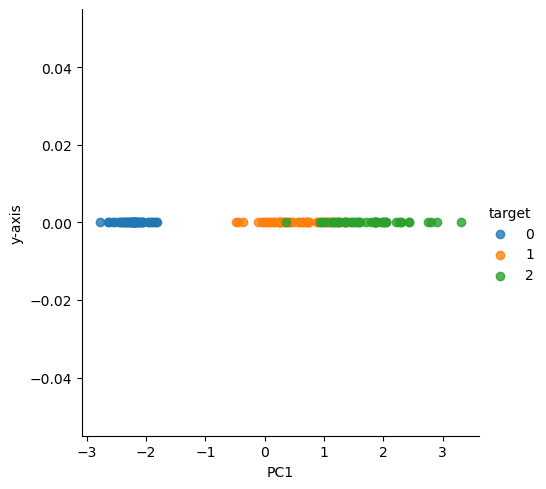

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) # reduce dim to 1
projected_x = pca.fit_transform(x_scaled)

# now compose the data frame for our analysis
df = pd.DataFrame(projected_x, columns=['PC1'])
df['y-axis'] = 0.0
df['target'] = y

# draw a plot with points
sns.lmplot(x='PC1', y='y-axis', data=df, fit_reg=False, hue="target")

# display dimensionality
print(x_scaled.shape)
print(projected_x.shape)

# since projected_x contains only 1 column, reshape it as 2D array
# using reshape(-1, 1) method
data = projected_x.reshape(-1, 1)

In [8]:
# divide the data into two parts
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

# train the model. we are using Support Vector Machine
from sklearn.svm import SVC
model = SVC() # c=1.0, kernel='rbf', gamma='scale'
model.fit(x_train, y_train)

SVC()

In [9]:
# find accuracy level
model.score(x_test, y_test)

0.9

In [10]:
# enter your own data for prediction
inputs = np.array([[6.6,3.0,4.4,1.4]])

# convert inputs using StandardScaler
scaled = scaler.transform(inputs)

# apply pca and transform (do not use fit)
pca_inputs = pca.transform(scaled)

# make prediction
model.predict(pca_inputs) # array([1]) -> versicolor

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])